<a href="https://colab.research.google.com/github/sayanroy577/Car-Price-Prediction/blob/main/1_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing Data

In [ ]:
df=pd.read_csv('car data.csv')


# Top 5 rows of dataset

In [ ]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Last 5 rows of dataset

In [ ]:
df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Number of Rows & Columns

In [ ]:
df.shape

(301, 9)

In [ ]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 301
Number of Columns: 9


# Check Null Values

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


# Total Information of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Statistics of Dataset

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Adding 'Age' Column

In [ ]:
import datetime
current_date=datetime.datetime.now()

In [ ]:
current_date.year

2024

In [ ]:
df['Age']=current_date.year-df['Year']

# Dropping Year Column

In [ ]:
df.drop(columns="Year",inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# Distribution of Categorical Data

In [ ]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

# Transforming Categorical to Numerical Data

In [ ]:
df["Fuel_Type"]=df["Fuel_Type"].astype('category').cat.codes
df["Seller_Type"]=df["Seller_Type"].astype('category').cat.codes
df["Transmission"]=df["Transmission"].astype('category').cat.codes
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,0,1,0,10
1,sx4,4.75,9.54,43000,1,0,1,0,11
2,ciaz,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2.85,4.15,5200,2,0,1,0,13
4,swift,4.60,6.87,42450,1,0,1,0,10


# Splitting the dataset into Training & Testing Data

In [ ]:
x=df.drop(columns=['Car_Name','Selling_Price'])
y=df['Selling_Price']

# Splitting Training & Testing Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Linear Regression Model Training

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Prediction on Training Data**

In [ ]:
x_train_pred=lr.predict(x_train)
error_score=metrics.r2_score(x_train_pred,y_train)
print("R square error :",error_score)


R square error : 0.8685439505823116


# Visualizing The Actual & Predicted Price

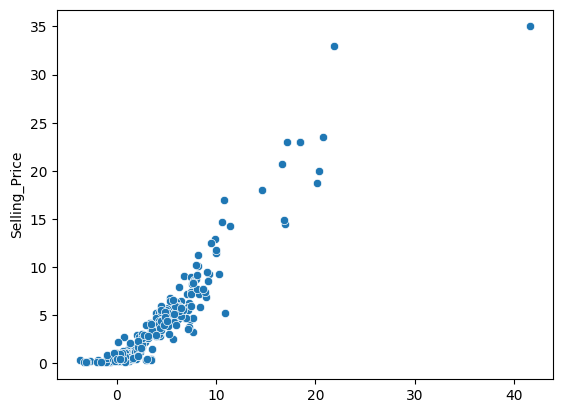

In [ ]:
sns.scatterplot(x=x_train_pred,y=y_train)
plt.show()

**Prediction of Testing Data**

In [ ]:
x_test_pred=lr.predict(x_test)
error_score=metrics.r2_score(x_test_pred,y_test)
print("R square error :",error_score)

R square error : 0.8193296211105697


# Visualizing The Actual & Predicted Value

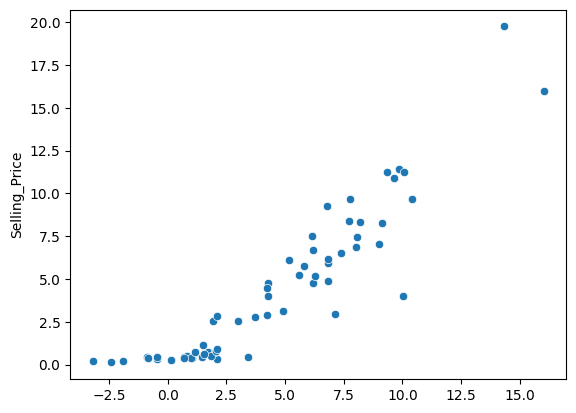

In [ ]:
sns.scatterplot(x=x_test_pred,y=y_test)
plt.show()